<center>
<img src="logo.png" height="900"> 
</center>


#  Состоятельность и охота на мамонтов

Когда статистик оценивает какой-нибудь параметр, он хочет: 

* __несмещённость__ (при фиксированном размере выборки мы в среднем не ошибаемся) 
* __состоятельность__ (при бесконечном расширении выборки мы приходим к истинному значению)
* __эффективность__ (у нашей оценки самая маленькая дисперсия для её класса (например, для всех несмещенных оценок))
* иногда ещё статистик ссылается на какую-то мифическую __асимптотическую нормальность__ оценки.

В этой тетрадке поговорим про состоятельность. 

In [2]:
import numpy as np
import pandas as pd

from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')  # стиль для графиков
%matplotlib inline

__Определение:__  Оценка $\hat \theta$ параметра $\theta$ называется __состоятельной,__ если $\hat \theta \to \theta$ по вероятности при росте $n$. 

In [3]:
norm_rv = stats.norm(loc=300, scale=100)

# вся генеральная совокупность 
x_mamont = norm_rv.rvs(size = 10**6)

theta_real = np.mean(x_mamont) # настоящее среднее
theta_real

np.float64(300.0543400907987)

## Состоятельные мамонтоборцы 


__Шаманы и их оценки:__

\begin{equation*}
\begin{aligned}
& \hat \theta_{od} = \frac{1}{n}\sum_{i=1}^{n} x_i \\
& \hat \theta_{pe} = \frac{1}{n}\sum_{i=1}^{n} x_i - \frac{4200}{n} \\
& \hat \theta_{ap} = \frac{1}{n}\sum_{i=1}^{n} x_i - \frac{5 \cdot (n+1)}{n} \\
\end{aligned}
\end{equation*}

In [24]:
theta_hat = np.zeros((100, 50))

for n in range(100, 10100, 100): # поднимаемся выше и видим больше мамонтов
    
    # 50 выборок с повторениями для простоты 
    x_sample = np.random.choice(x_mamont, size = (n, 50), replace=False)
    
    # 50 разных оценок 
    x_mean = np.mean(x_sample, axis=0) 
    
    #theta_hat[n//100 - 1] = x_mean                # состоятельная

    
    #theta_hat[n//100 - 1] = (x_mean - 4200/n)     # состоятельная
    theta_hat[n//100 - 1] = (x_mean - 5*(n+1)/n)   # несостоятельная 

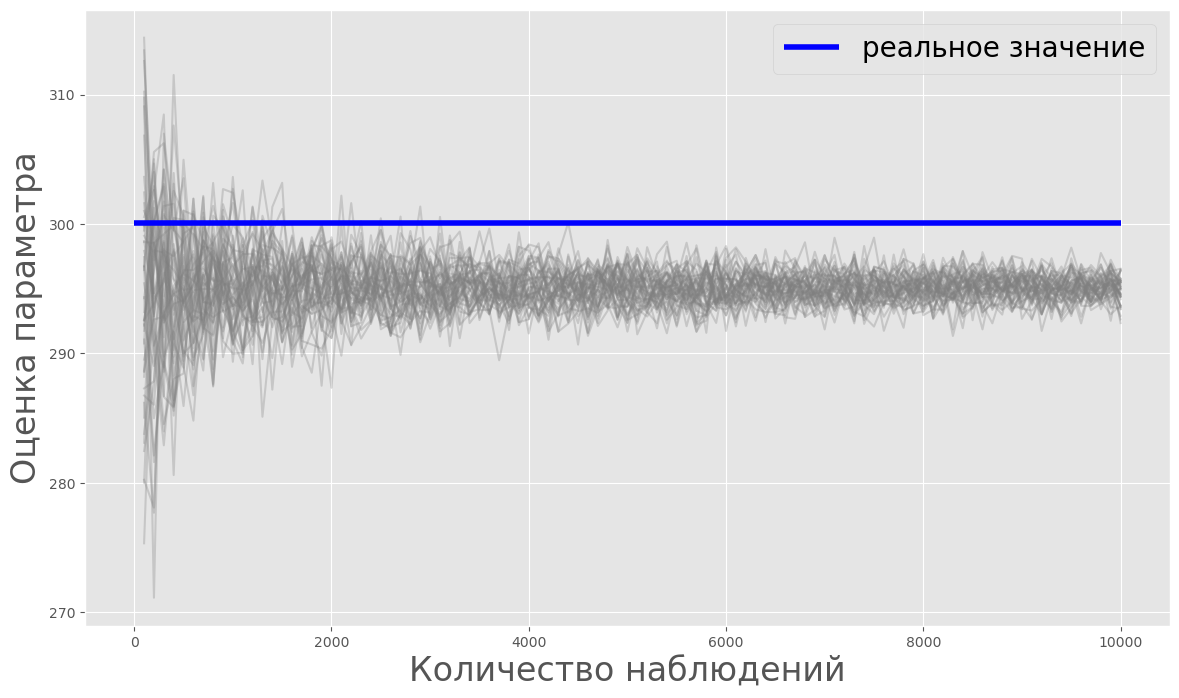

In [25]:
plt.figure(figsize=(14,8))
plt.plot(np.arange(100, 10100, 100), 
         theta_hat, c='grey', alpha = 0.3)

plt.xlabel('Количество наблюдений', size=24)
plt.ylabel('Оценка параметра', size=24)

plt.hlines(theta_real, 0, 10000, color='blue', lw=4, label='реальное значение')
plt.legend(fontsize=20);

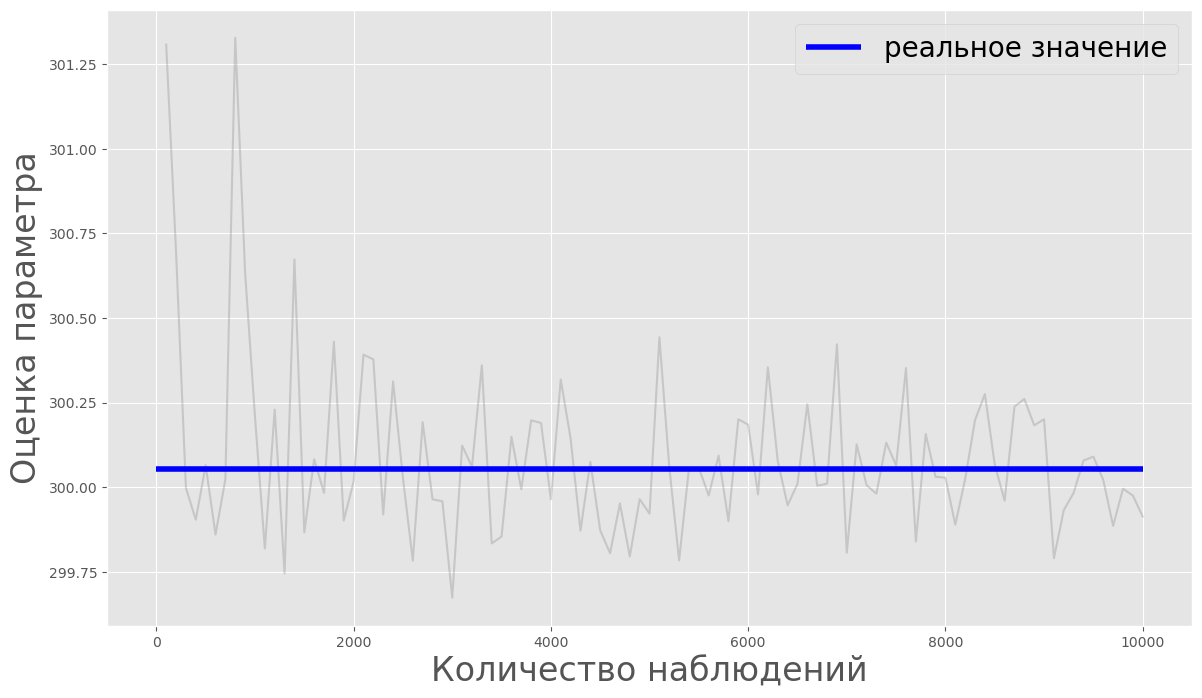

In [21]:
plt.figure(figsize=(14,8))
plt.plot(np.arange(100, 10100, 100), 
         theta_hat.mean(axis=1), c='grey', alpha = 0.3)

plt.xlabel('Количество наблюдений', size=24)
plt.ylabel('Оценка параметра', size=24)

plt.hlines(theta_real, 0, 10000, color='blue', lw=4, label='реальное значение')
plt.legend(fontsize=20);

In [17]:
theta_hat.shape

(100, 50)

In [20]:
theta_hat.mean(axis=1).shape

(100,)

__Ещё раз, ещё раз:__ нельзя путать состоятельности и несмещённость. Состоятельность означает, что мы при расширении выборки приходим к истине. Несмещённость, что мы при фиксированном размере выборке в среднем не ошибаемся. Состоятельность это то свойство оценки, за которое стоит бороться. Без этого свойства нет никакого смысла использовать оценку. 